In [2]:
import os
import logging
import glob
import pandas as pd

import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from zoobot import label_metadata, schemas
from zoobot.data_utils import image_datasets
from zoobot.estimators import preprocess

import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO)

In [2]:
decals_test = pd.read_csv('../Ilifu_data/decals_ilifu_test.csv')

In [3]:
test_paths = decals_test['file_loc'].to_numpy()

In [4]:
file_format = 'png'
initial_size = 224
batch_size = 64
raw_image_ds = image_datasets.get_image_dataset([str(x) for x in test_paths], file_format, initial_size, batch_size) # we do not need this one

preprocessing_config = preprocess.PreprocessingConfig(
    label_cols=[],
    input_size=initial_size,
    make_greyscale=False,
    normalise_from_uint8=True
)

image_ds = preprocess.preprocess_dataset(raw_image_ds, preprocessing_config)

INFO:root:Images to predict on: 49917
2021-11-10 11:54:08.407312: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-11-10 11:54:09.192134: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 11:54:09.193112: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:08.0 name: Tesla P100-PCIE-12GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 511.41GiB/s
2021-11-10 11:54:09.193177: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-11-10 11:54:09.259726: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-11-10 11:54:09.259

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


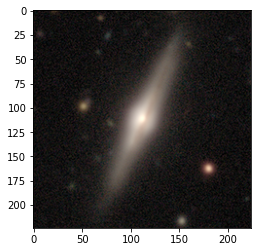

In [5]:
for element in image_ds:
    for image in element[0]:
        img = np.array(image)
    break

plt.imshow(img)
plt.show()

In [6]:
model = tf.keras.models.load_model('../autoencoder/model_save')

print(model.summary())

Model: "galaxy_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 6272)              2192      
_________________________________________________________________
sequential_1 (Sequential)    (None, 224, 224, 3)       2771      
Total params: 4,963
Trainable params: 4,963
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
test = np.array([img])
output = model.predict(test)

2021-11-10 11:54:18.877349: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-11-10 11:54:20.852617: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2021-11-10 11:54:23.748474: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-11-10 11:54:26.647423: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


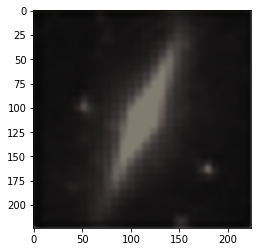

In [8]:
plt.imshow(output[0])
plt.show()

In [9]:
output.shape

(1, 224, 224, 3)

In [10]:
auto_features = model.encoder.predict(image_ds)

In [11]:
auto_features.shape

(49917, 6272)

In [12]:
decals_test['file_loc']

0        /idia/projects/hippo/gzd/dr5/J125/J125920.19+2...
1        /idia/projects/hippo/gzd/dr5/J120/J120253.78+0...
2        /idia/projects/hippo/gzd/dr5/J122/J122810.96-0...
3        /idia/projects/hippo/gzd/dr5/J081/J081210.18+2...
4        /idia/projects/hippo/gzd/dr5/J141/J141644.38+0...
                               ...                        
49912    /idia/projects/hippo/gzd/dr5/J024/J024344.67+0...
49913    /idia/projects/hippo/gzd/dr5/J142/J142539.90+2...
49914    /idia/projects/hippo/gzd/dr5/J024/J024610.49+0...
49915    /idia/projects/hippo/gzd/dr5/J102/J102309.79-0...
49916    /idia/projects/hippo/gzd/dr5/J121/J121303.29-0...
Name: file_loc, Length: 49917, dtype: object

In [13]:
auto_df = pd.DataFrame(auto_features)

In [14]:
final_features = pd.DataFrame(decals_test['file_loc'])
final_features = final_features.join(auto_df)

In [15]:
final_features

,file_loc,0,1,2,3,4,5,6,7,8,...,6262,6263,6264,6265,6266,6267,6268,6269,6270,6271
0,/idia/projects/hippo/gzd/dr5/J125/J125920.19+2...,0.271916,0.450374,0.112284,0.326452,0.345026,1.005152,0.088172,0.0,0.241892,...,0.001158,0.010861,0.351322,0.255591,0.0,0.216271,0.207336,0.944342,0.113030,0.021744
1,/idia/projects/hippo/gzd/dr5/J120/J120253.78+0...,0.231431,0.404627,0.097868,0.256942,0.275094,0.871741,0.089938,0.0,0.208582,...,0.003841,0.032557,0.320296,0.198794,0.0,0.219161,0.185216,0.837556,0.084660,0.058151
2,/idia/projects/hippo/gzd/dr5/J122/J122810.96-0...,0.243622,0.425679,0.100531,0.287532,0.293652,0.894818,0.098181,0.0,0.232184,...,0.000000,0.048447,0.316031,0.233246,0.0,0.223587,0.196358,0.864050,0.104325,0.034204
3,/idia/projects/hippo/gzd/dr5/J081/J081210.18+2...,0.242886,0.411687,0.080105,0.278550,0.262371,0.850705,0.090289,0.0,0.219727,...,0.008123,0.102314,0.222676,0.143924,0.0,0.222761,0.146341,0.527814,0.067508,0.099108
4,/idia/projects/hippo/gzd/dr5/J141/J141644.38+0...,0.242794,0.450366,0.100101,0.293445,0.305799,0.955598,0.105802,0.0,0.232000,...,0.000000,0.065292,0.285240,0.193956,0.0,0.217466,0.155776,0.759130,0.070074,0.078443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49912,/idia/projects/hippo/gzd/dr5/J024/J024344.67+0...,0.263438,0.404644,0.103165,0.281000,0.285008,0.880090,0.088423,0.0,0.225407,...,0.000000,0.052534,0.301166,0.220690,0.0,0.231285,0.183302,0.820091,0.085231,0.050730
49913,/idia/projects/hippo/gzd/dr5/J142/J142539.90+2...,0.235493,0.406723,0.114827,0.287716,0.244101,0.826734,0.113559,0.0,0.194889,...,0.004485,0.047812,0.304455,0.203650,0.0,0.203249,0.178082,0.841518,0.099317,0.045943
49914,/idia/projects/hippo/gzd/dr5/J024/J024610.49+0...,0.253772,0.411041,0.101407,0.270631,0.272656,0.894408,0.080687,0.0,0.206630,...,0.000616,0.030805,0.320744,0.229067,0.0,0.225112,0.182377,0.889903,0.102844,0.015199
49915,/idia/projects/hippo/gzd/dr5/J102/J102309.79-0...,0.243583,0.425867,0.095108,0.278965,0.280683,0.885607,0.094051,0.0,0.216603,...,0.000000,0.055073,0.313889,0.218427,0.0,0.212140,0.177038,0.852351,0.082807,0.051483


In [15]:
final_features.to_csv("../autoencoder/extracted_features.csv", index=False)